<a href="https://colab.research.google.com/github/andrespeedwork/analise-dados-boas-praticas/blob/main/MVP_Sprint_2_An%C3%A1lise_de_Dados_e_Boas_Pr%C3%A1ticas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INTRODUÇÃO:**
Os Estados Unidos sofrem, ano após ano, com os constantes ataques de urso em seu território. Ainda que este pareça ser um problema alheio aos residentes da América do Sul, este é um tema de preocupação e que exige políticas governamentais para nossos vizinhos do norte.

Partindo deste problema, o conjunto de dados analisado mostra os registros de ataques de urso na América do Norte, constando o perfil da vítima (com idade e gênero, por exemplo), os locais de ataque, o tipo de urso que protagonizou o ataque e os casos em que o episódio foi mortal.  

A partir desta base de dados que traz informações partindo da década de 1901, este notebook busca compreender o nível de mortalidade dos ataques e os perfis mais atingidos por eles. Assim, assume-se como hipótese que, em caso de ataque, a chance de morte é superior a 50%.

Não há ajuste de hiperparâmetros que impacte no potencial de otimização do modelo. Ademais, o presente trabalho trata de um problema não supervisionado e busca identificar padrões nas ocorrências de ataques.

Ao longo do trabalho apresenta-se os atributos do dataset e as restrições para seleção dos dados.


# **ATRIBUTOS DO DATASET:**



Name: nome e sobrenome da vítima do ataque;

age: idade da vítima;

gender: gênero da vítima (fem/masc/outros);

Date: data do ataque;

Month: mês do ataque;

Year: ano do ataque;

Type: informa de o animal é selvagem ou de cativeiro;

Location: região e estado onde o incidente ocorreu;

Description: em qual circustância o fato ocorreu;

Type of bear: tipo do animal (polar, pardo, etc.);

Hunter: informação não identificada;

Grizzly: indicação de que o tipo de urso era pardo;

Hikers: indicação se o ataque ocorreu em uma vítima que caminhava a pé;

Only one killed: indicação se o ataque foi fatal;

Latitude: localização;

Longitude: localização.


In [292]:
# Montando drive colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [293]:
# Biblioteca responsável por fazer a leitura e impressão da base de dados
import pandas as pd #Importando PANDAS e criando alias para facilitar na digitação
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns # para gerar gráficos mais atrativos com códigos mais limpos e mais simples.
from scipy.stats import pearsonr
import copy

In [295]:
#Realizando a importação do arquivo csv
# Ler o arquivo csv. use the raw URL to access the raw data content of the file
df = pd.read_csv('https://raw.githubusercontent.com/andrespeedwork/analise-dados-boas-praticas/main/urso.csv')
# Verifique se o arquivo foi lido corretamente
df.head()

,Name,age,gender,Date,Month,Year,Type,Location,Description,Type of bear,Hunter,Grizzly,Hikers,Only one killed,Latitude,Longitude
0,Mary Porterfield,3.0,female,19/05/1901,May,1901,Wild,"Job, West Virginia",The children were gathering flowers near their...,Black bear,0,0,0,0,38.864277,-79.556998
1,Wilie Porterfield,5.0,male,19/05/1901,May,1901,Wild,"Job, West Virginia",The children were gathering flowers near their...,Black bear,0,0,0,0,38.864277,-79.556998
2,Henry Porterfield,7.0,male,19/05/1901,May,1901,Wild,"Job, West Virginia",The children were gathering flowers near their...,Black bear,0,0,0,0,38.864277,-79.556998
3,John Dicht,18.0,male,24/11/1906,Nov,1906,Wild,"Elk County, Pennsylvania","Thinking the bear was dead, Dicht began skinni...",Black bear,0,0,0,1,41.437362,-78.626009
4,Baby Laird,1.0,NaN,05/10/1908,Oct,1908,Captive,"Tucson, Arizona",After a bear escaped from a cage at Elysian Gr...,Black bear,0,0,0,1,32.222876,-110.974847


In [272]:
#Realizando a importação do arquivo csv
# Ler o arquivo csv
df = pd.read_csv('https://raw.githubusercontent.com/andrespeedwork/analise-dados-boas-praticas/main/urso.csv')

In [273]:
# Visualizando o arquivo
display(df.head(50))  # Print the first few rows of the DataFrame

,Name,age,gender,Date,Month,Year,Type,Location,Description,Type of bear,Hunter,Grizzly,Hikers,Only one killed,Latitude,Longitude
0,Mary Porterfield,3.0,female,19/05/1901,May,1901,Wild,"Job, West Virginia",The children were gathering flowers near their...,Black bear,0,0,0,0,38.864277,-79.556998
1,Wilie Porterfield,5.0,male,19/05/1901,May,1901,Wild,"Job, West Virginia",The children were gathering flowers near their...,Black bear,0,0,0,0,38.864277,-79.556998
2,Henry Porterfield,7.0,male,19/05/1901,May,1901,Wild,"Job, West Virginia",The children were gathering flowers near their...,Black bear,0,0,0,0,38.864277,-79.556998
3,John Dicht,18.0,male,24/11/1906,Nov,1906,Wild,"Elk County, Pennsylvania","Thinking the bear was dead, Dicht began skinni...",Black bear,0,0,0,1,41.437362,-78.626009
4,Baby Laird,1.0,NaN,05/10/1908,Oct,1908,Captive,"Tucson, Arizona",After a bear escaped from a cage at Elysian Gr...,Black bear,0,0,0,1,32.222876,-110.974847
5,Frank Welch,61.0,male,08/09/1916,Sep,1916,Wild,"Yellowstone National Park, Wyoming",Welch was killed at a camp near Sylvan Pass wh...,Brown bear,0,0,0,1,44.620089,-110.560689
6,"Joseph B. ""Frenchy"" Duret",60.0,male,12/06/1922,Jun,1922,Wild,"Absaroka-Beartooth Wilderness, Montana",Duret was attacked and partially devoured by a...,Brown bear,0,1,0,1,45.269612,-109.968024
7,Olga Gregorchuk,9.0,female,29/08/1929,Aug,1929,Wild,"near Lac Du Bonnet, Manitoba",Gregorchuk was minding her four-year-old broth...,Black bear,0,0,0,1,NaN,NaN
8,Percy Goodair,52.0,male,12/09/1929,Sep,1929,Wild,"Jasper National Park, Alberta","Goodair, a Parks Canada warden, was killed by ...",Brown bear,0,0,0,1,52.804103,-117.804827
9,Jack Thayer,NaN,male,16/10/1929,Oct,1929,Wild,"Admiralty Island, Alaska","Thayer, a U.S. Forest Service employee, and Fr...",Brown bear,0,0,0,1,57.713324,-134.409838


In [296]:
df_urso = df.copy()
df_urso.drop( columns = ['Name','Type of bear', 'gender', 'Date', 'Description','Latitude','Longitude'],inplace=True)

# **ANALISE DE DADOS**
Nesta etapa a ideia é entender a informação que está disponível, levando em conta algumas estatísticas descritivas para uma possível necessidade de transformação na etapa de preparação de dados. Abaixo, foram dispostos alguns comandos, bem como suas finalidades. Neste sentido, buscou-se identificar, por exemplo, inconsistências e valores faltantes e produziu-se um resumo estatístico.

In [297]:
#Informa a quantidade de atributos e instâncias existentes
print(df_urso.shape)

(166, 9)


In [298]:
# Informa quais são os tipos de dados dos atributos
print(df_urso.dtypes)

 age               float64
Month               object
Year                 int64
Type                object
Location            object
Hunter               int64
Grizzly              int64
Hikers               int64
Only one killed      int64
dtype: object


In [299]:
# Verifica as primeiras linhas do dataset e não foram encontradas inconsistências
df_urso.describe()

,age,Year,Hunter,Grizzly,Hikers,Only one killed
count,164.000000,166.000000,166.000000,166.000000,166.000000,166.000000
mean,36.117378,1981.313253,0.096386,0.162651,0.036145,0.831325
std,20.379920,28.868323,0.296012,0.370163,0.187215,0.375597
min,0.416667,1901.000000,0.000000,0.000000,0.000000,0.000000
25%,19.750000,1967.000000,0.000000,0.000000,0.000000,1.000000
50%,36.500000,1987.000000,0.000000,0.000000,0.000000,1.000000
75%,51.250000,2005.000000,0.000000,0.000000,0.000000,1.000000
max,93.000000,2018.000000,1.000000,1.000000,1.000000,1.000000


In [300]:
# Verifica se há valores faltantes, discrepantes e/ou inconsistentes
missing_values = df_urso.isnull().sum()
print("Valores faltantes por coluna:")
print(missing_values)

Valores faltantes por coluna:
 age               2
Month              0
Year               0
Type               0
Location           0
Hunter             0
Grizzly            0
Hikers             0
Only one killed    0
dtype: int64


In [301]:
# Resumo estatístico dos atributos com valor numérico (mínimo, máximo, mediana, moda, média, desvio-padrão e número de valores ausentes).
# Filtrar apenas as colunas numéricas
numeric_df = df.select_dtypes(include=['float64', 'int64'])


In [302]:
print(df_urso.dtypes)

 age               float64
Month               object
Year                 int64
Type                object
Location            object
Hunter               int64
Grizzly              int64
Hikers               int64
Only one killed      int64
dtype: object


In [303]:
# Resumo estatístico básico (média, desvio-padrão, mínimo, máximo, etc.)
stats_summary = numeric_df.describe()

# Cálculo da mediana para cada coluna numérica
median_values = numeric_df.median()

# Cálculo da moda para cada coluna numérica
mode_values = numeric_df.mode().iloc[0]

# Contagem de valores ausentes
missing_values = numeric_df.isnull().sum()

# Exibir o resumo completo
print("Resumo Estatístico:")
print(stats_summary)
print("\nMedianas:")
print(median_values)
print("\nModas:")
print(mode_values)
print("\nNúmero de valores ausentes por coluna:")
print(missing_values)

Resumo Estatístico:
              age         Year      Hunter     Grizzly      Hikers  \
count  164.000000   166.000000  166.000000  166.000000  166.000000   
mean    36.117378  1981.313253    0.096386    0.162651    0.036145   
std     20.379920    28.868323    0.296012    0.370163    0.187215   
min      0.416667  1901.000000    0.000000    0.000000    0.000000   
25%     19.750000  1967.000000    0.000000    0.000000    0.000000   
50%     36.500000  1987.000000    0.000000    0.000000    0.000000   
75%     51.250000  2005.000000    0.000000    0.000000    0.000000   
max     93.000000  2018.000000    1.000000    1.000000    1.000000   

       Only one killed    Latitude   Longitude  
count       166.000000  120.000000  120.000000  
mean          0.831325   48.796409 -110.433113  
std           0.375597    9.294266   24.480565  
min           0.000000   30.785744 -163.007648  
25%           1.000000   41.839680 -123.969594  
50%           1.000000   46.318989 -110.980410  
75%   

# **PRÉ-PROCESSAMENTO DE DADOS**
Nesta etapa a ideia é realizar operações de limpeza, tratamento e preparação dos dados. Como o dataset dispõe da coluna categórica "gender", que não pode ser usada diretamente pelo modelo, optei por usar a operação "one-hot encoding" para transformar a categoria em formato numérico.

In [304]:
# Usando a operação "one-hot encoding" na coluna "gender".
encoded_df = pd.get_dummies(df, columns=['gender'])

In [305]:
# Exibir as primeiras linhas do dataset com as colunas one-hot encoded
print(encoded_df.head())

                Name   age        Date Month  Year     Type  \
0   Mary Porterfield   3.0  19/05/1901   May  1901     Wild   
1  Wilie Porterfield   5.0  19/05/1901   May  1901     Wild   
2  Henry Porterfield   7.0  19/05/1901   May  1901     Wild   
3         John Dicht  18.0  24/11/1906   Nov  1906     Wild   
4         Baby Laird   1.0  05/10/1908   Oct  1908  Captive   

                   Location  \
0        Job, West Virginia   
1        Job, West Virginia   
2        Job, West Virginia   
3  Elk County, Pennsylvania   
4           Tucson, Arizona   

                                         Description Type of bear  Hunter  \
0  The children were gathering flowers near their...   Black bear       0   
1  The children were gathering flowers near their...   Black bear       0   
2  The children were gathering flowers near their...   Black bear       0   
3  Thinking the bear was dead, Dicht began skinni...   Black bear       0   
4  After a bear escaped from a cage at Elysian Gr

In [306]:
# Salvar em CSV
df_urso.to_csv('df_urso1.csv', index=False)


In [307]:
# Tratando/Limpando e padronizando os dados

X = pd.read_csv('https://raw.githubusercontent.com/andrespeedwork/analise-dados-boas-praticas/main/df_urso1.csv')

print(X.shape)
print(X.head())

type_col = X[['Type']]
X.drop(['Type'], axis=1, inplace = True)

# OBS: Os dados se mostraram limpos e foram padronizados

(166, 9)
    age Month  Year     Type                  Location  Hunter  Grizzly  \
0   3.0   May  1901     Wild        Job, West Virginia       0        0   
1   5.0   May  1901     Wild        Job, West Virginia       0        0   
2   7.0   May  1901     Wild        Job, West Virginia       0        0   
3  18.0   Nov  1906     Wild  Elk County, Pennsylvania       0        0   
4   1.0   Oct  1908  Captive           Tucson, Arizona       0        0   

   Hikers  Only one killed  
0       0                0  
1       0                0  
2       0                0  
3       0                1  
4       0                1  


# **ANÁLISE EXPLORATÓRIA DOS DADOS**

O presente tópico visa trabalhar na manipulação de dados, a fim de torná-los mais adequados para análise e, assim, criar um histograma que promova uma análise vinulada a hipótese do trabalho. Para isso, o campo "only one killed" foi transformado para o tipo numérico, permitindo a elaboração do histograma.

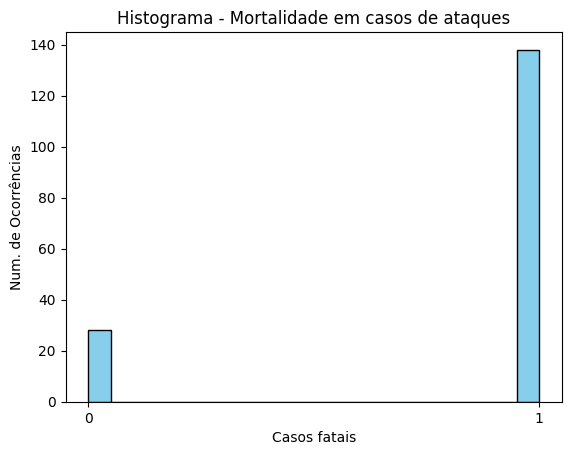

In [308]:
# Criando o histograma URSO
#Convert a coluna 'Only one killed' para o tipo string antes de criar o histograma
plt.hist(df['Only one killed'].astype(str), bins=20, color='skyblue', edgecolor='black')

# Adicionando rótulos e título
plt.xlabel('Casos fatais')
plt.ylabel('Num. de Ocorrências') # Rótulo alterado para refletir que o histograma está mostrando valor
plt.title('Histograma - Mortalidade em casos de ataques')

# Exibindo o histograma
plt.show()

Analisa-se o histograma acima compreendendo que a coluna "0" representa casos de ataque sem morte e a coluna "1" casos de ataque em que mortes foram reportadas. Neste sentido, podemos concluir que, de 166 células que constituem a tabela, em cerca de 140 a base de dados aponta casos de morte. Assim, compreende-se que, em casos de ataque, a chance de mortalidade da vítima é alta. Com base neste recorte de dados, a mortalidade representa cerca de 84% dos casos.

In [320]:
# Calcular o valor mais frequente (modo) da coluna 'gender'
mode_gender = df['gender'].mode()

# Verificar se mode_gender não está vazio
if len(mode_gender) > 0:
    mode_gender = mode_gender[0]

    # Preencher valores faltantes na coluna 'gender' com o modo
    df['gender'] = df['gender'].fillna(mode_gender)
else:
    # Lidar com o caso em que a coluna 'gênero' está vazia ou não tem modo
    print("Gender column is empty or has no mode.")

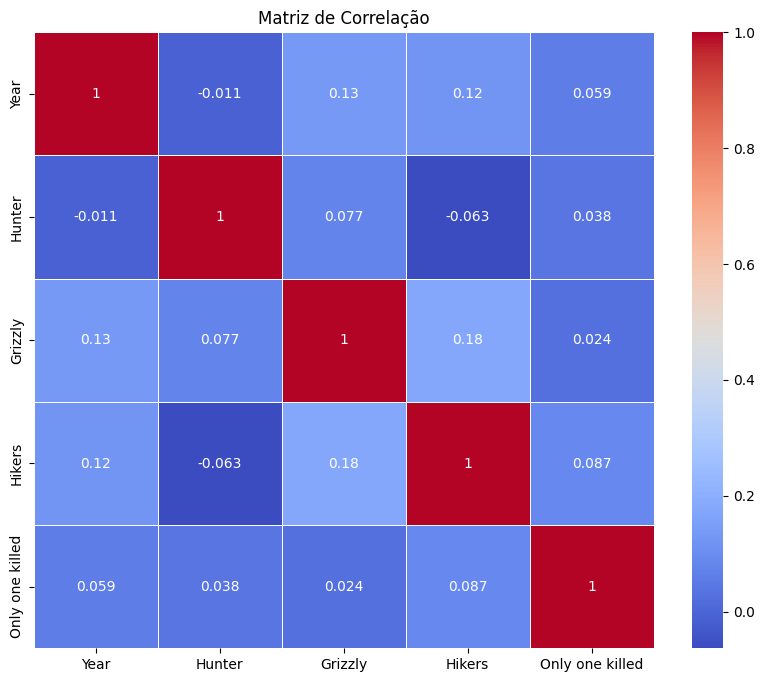

In [321]:
# Assumindo que df é seu DataFrame
df = pd.read_csv('https://raw.githubusercontent.com/andrespeedwork/analise-dados-boas-praticas/main/urso.csv') # Replace with your actual file path

# Selecionar apenas colunas numéricas para análise de correlação
int_df = df.select_dtypes(include=['int64']) # Changed object_df to numeric_df and modified include parameter

# Calcular a matriz de correlação
corr_matrix = int_df.corr()

# Criar o mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlação')
plt.show()

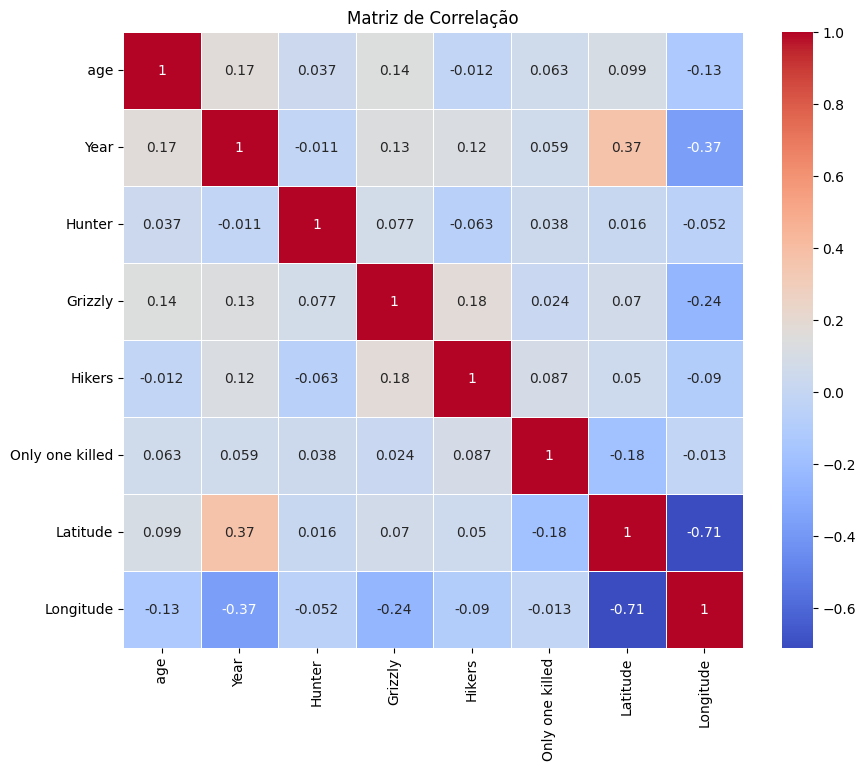

In [322]:
# Assumindo que df é seu DataFrame
df = pd.read_csv('https://raw.githubusercontent.com/andrespeedwork/analise-dados-boas-praticas/main/urso.csv') # Replace with your actual file path

# Selecionar apenas colunas numéricas para análise de correlação
numerical_df = df.select_dtypes(include=['number'])

# Calcular a matriz de correlação
corr_matrix = numerical_df.corr()

# Criar o mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlação')
plt.show()

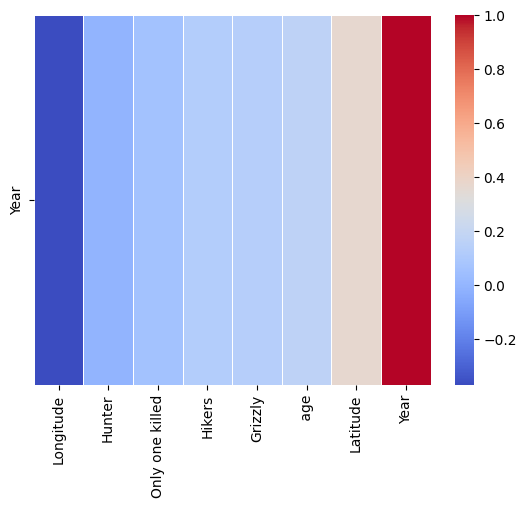

In [323]:
sns.heatmap(corr_matrix[['Year']].sort_values(by='Year').T, annot=False, cmap='coolwarm', linewidths=0.5)
plt.show()

In [324]:
print(corr_matrix[['Year']].sort_values(by='Year'))

                     Year
Longitude       -0.369668
Hunter          -0.010647
Only one killed  0.059121
Hikers           0.123488
Grizzly          0.133589
 age             0.169412
Latitude         0.365491
Year             1.000000


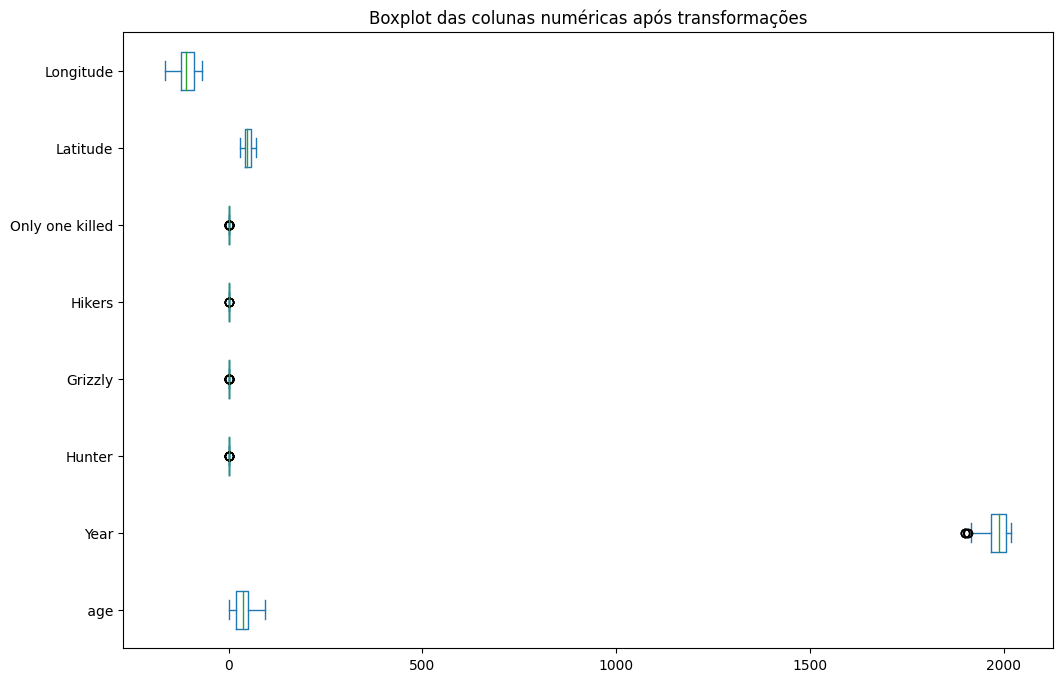

In [329]:
# Gerar boxplot novamente para verificar outliers
df[numeric_df.columns].plot(kind='box', figsize=(12, 8), vert=False)
plt.title("Boxplot das colunas numéricas após transformações")
plt.show()

# **CONCLUSÃO**

Neste MVP buscou-se tratar um dataset e analisá-lo de maneira discritiva. Ademais, objetivou-se identificar incosistências e campos incoerentes. Uma vez que este tratou-se de um problema não supervisionado, o objetivo foi identificar padrões.

Quanto ao processo de elaboração, destacam-se alguns pontos:

1- Da definição do problema: houve dificuldade para encontrar o dataset correto pois, para alguém em nível iniciante, é desafiador contar uma história com os dados e analisá-los. No entando, busquei o fazê-lo, ainda que dentro das limitações;

2- Uma vez com algumas perguntas elencadas, buscou-se uma base de dados confiável e segura, de acordo com a indicação do curso.

3- Baixou-se o arquivo csv localmente e depois subiu-se este para o notebook de forma manual.

4- Por fim, conseguiu-se determinar que existe uma altíssima mortalidade em casos de ataque de urso na América do Norte, tornando este um problema local relevante. Em outra oportunidade, mais aspectos poderiam ser explorados, como as regiões mais atingidas por ataques.

# **REFERÊNCIAS**


Python -  Bear Attacks North America, 2024 em: https://www.kaggle.com/code/alaaabdelstar/bear-attacks-north-america Acesso em: 26/09/2024.

Bear Attacks North America. Kaggle, 2021. Disponível em: https://www.kaggle.com/datasets/stealthtechnologies/bear-attacks-north-america/data. Acesso em: 20/09/2024.

Introdução à Ciência de Dados (Data Science): Didática Tech. Youtube, 2022. Disponível em: https://www.youtube.com/watch?v=sjpBNi4DgI0. Acesso em: 19/09/2024

Como criar um projeto de Data Science do zero para seu Portfólio | Hipsters: Portfólio Dev. Youtube, 2024. Disponível em: https://www.youtube.com/watch?v=hV3ORe7F8Q4. Acesso em: 18/09/2024
